In [1]:
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *

from pathlib import Path

path = Path.cwd(); path

PosixPath('/notebooks/music-genre-classification')

In [3]:
bs = 64 # batch size

In [51]:
data_folder = path/'data'/'genres'

# get images
size=224

#tfm_crop = [[crop(224, row_pct=(0,1), col_pct=0)]]
tfms = get_transforms(do_flip=False, max_rotate=None, max_warp=None, max_zoom=0) #, xtra_tfms=tfm_crop)

data = ImageList.from_folder(data_folder, recurse=True).split_by_rand_pct(0.2, seed=2).label_from_folder() \
        .transform(tfms, size=size, resize_method=ResizeMethod.SQUISH).databunch()


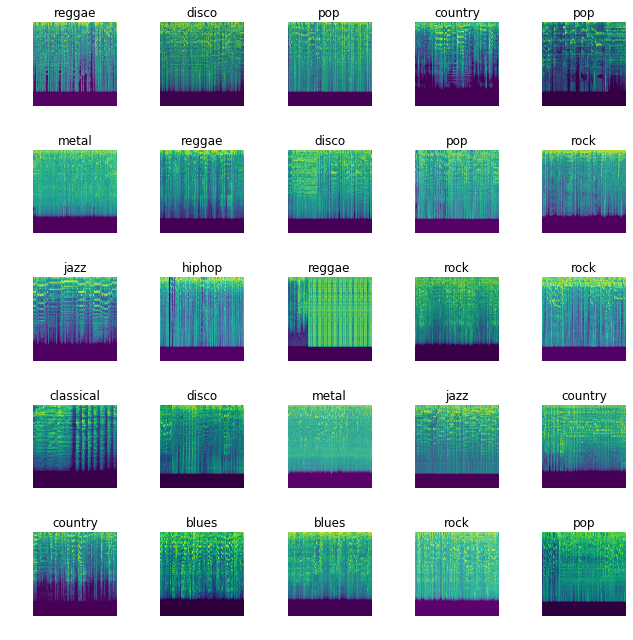

In [52]:
data.show_batch(rows=5, figsize=(9,9))

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


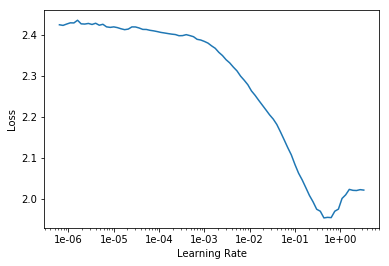

In [53]:
# bn_final = whether to perform batch normalization on the final layer
learn = cnn_learner(data, models.resnet34, metrics=error_rate, bn_final=True)
learn.lr_find(); learn.recorder.plot()

In [55]:
learn.fit_one_cycle(6, slice(9e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.610332,1.999288,0.460000,00:06
1,0.599905,3.329777,0.500000,00:06
2,0.550187,1.543732,0.350000,00:06


In [44]:
learn.fit_one_cycle(2, slice(1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.589358,1.180648,0.360000,00:06
1,0.547743,1.143182,0.355000,00:06


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


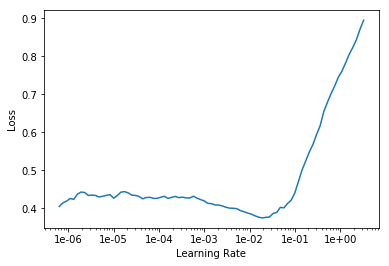

In [56]:
learn.lr_find(); learn.recorder.plot()

In [57]:
learn.fit_one_cycle(5, slice(5e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.396661,1.108543,0.305000,00:06
1,0.384496,0.962333,0.280000,00:06
2,0.361861,0.924268,0.260000,00:06
3,0.338052,0.910009,0.265000,00:06
4,0.321670,0.902002,0.270000,00:06


In [20]:
#learn.save('stage-1-36')
#learn.load('stage-1-36')

learn.save('stage-1-25-squish')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


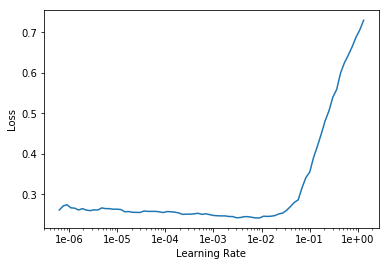

In [58]:
learn.lr_find()
learn.recorder.plot()

In [65]:
learn.save('temp-unfreeze-test-28')

In [72]:
from tqdm import tqdm

num_epochs_list = [3, 5, 7] # done consecutively & incrementally

def generate_slices(lr_list):
    return [slice(x,y) for x in lr_list for y in lr_list if x < y]

all_results = pd.DataFrame()
slice_list = generate_slices([1e-6, 1e-5, 1e-4, 1e-3, 1e-2])

for num_epochs in num_epochs_list:
    for item in tqdm(slice_list):
        learn.load('temp-unfreeze-test-28')
        learn.unfreeze()

        learn.fit_one_cycle(num_epochs, max_lr=item)

        valid_score = learn.validate()

        all_results = all_results.append(pd.Series({'slice_start': item.start,
                                                    'slice_end': item.stop,
                                                    'valid_loss': valid_score[0],
                                                    'error_rate': valid_score[1].item(),
                                                    'num_epochs': num_epochs}
                                                   ), ignore_index=True)

all_results



  0%|          | 0/10 [00:00<?, ?it/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.254928,0.885117,0.280000,00:07
1,0.257618,0.875300,0.275000,00:07
2,0.247481,0.871004,0.275000,00:07




 10%|█         | 1/10 [00:24<03:38, 24.29s/it]

epoch,train_loss,valid_loss,error_rate,time
0,0.248924,0.885007,0.250000,00:07
1,0.243946,0.875569,0.265000,00:07
2,0.229427,0.871887,0.255000,00:07




 20%|██        | 2/10 [00:48<03:13, 24.13s/it]

epoch,train_loss,valid_loss,error_rate,time
0,0.268077,0.890542,0.275000,00:07
1,0.229494,0.899162,0.230000,00:07
2,0.203617,0.866827,0.245000,00:07




 30%|███       | 3/10 [01:11<02:47, 23.98s/it]

epoch,train_loss,valid_loss,error_rate,time
0,0.267826,0.981671,0.275000,00:07
1,0.232378,1.007177,0.260000,00:07
2,0.195638,0.902167,0.255000,00:07




 40%|████      | 4/10 [01:35<02:23, 23.95s/it]

epoch,train_loss,valid_loss,error_rate,time
0,0.272416,0.875734,0.260000,00:07
1,0.221218,0.900672,0.270000,00:07
2,0.197770,0.865141,0.255000,00:07




 50%|█████     | 5/10 [01:59<02:00, 24.03s/it]

epoch,train_loss,valid_loss,error_rate,time
0,0.262553,0.954118,0.255000,00:07
1,0.245569,0.983723,0.250000,00:07
2,0.221723,0.916925,0.240000,00:07




 60%|██████    | 6/10 [02:23<01:36, 24.03s/it]

epoch,train_loss,valid_loss,error_rate,time
0,0.348912,1.338547,0.340000,00:07
1,0.392834,1.380538,0.345000,00:07
2,0.325500,0.960988,0.280000,00:07




 70%|███████   | 7/10 [02:47<01:11, 23.95s/it]

epoch,train_loss,valid_loss,error_rate,time
0,0.380984,1.630540,0.395000,00:07
1,0.410005,1.271571,0.315000,00:07
2,0.331773,0.873576,0.240000,00:07




 80%|████████  | 8/10 [03:11<00:48, 24.01s/it]

epoch,train_loss,valid_loss,error_rate,time
0,0.611956,3.360620,0.600000,00:07
1,0.711968,3.553077,0.495000,00:07
2,0.594309,0.983313,0.305000,00:07




 90%|█████████ | 9/10 [03:35<00:23, 23.96s/it]

epoch,train_loss,valid_loss,error_rate,time
0,1.079062,327.682037,0.890000,00:07
1,1.033246,25.532618,0.735000,00:07
2,0.904260,1.600263,0.450000,00:07




100%|██████████| 10/10 [03:59<00:00, 23.92s/it]



  0%|          | 0/10 [00:00<?, ?it/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.281036,0.884769,0.280000,00:07
1,0.280277,0.870261,0.280000,00:07
2,0.270910,0.862738,0.260000,00:07
3,0.249231,0.856670,0.255000,00:07
4,0.235738,0.848890,0.255000,00:07




 10%|█         | 1/10 [00:38<05:48, 38.73s/it]

epoch,train_loss,valid_loss,error_rate,time
0,0.260759,0.880295,0.270000,00:07
1,0.242450,0.871087,0.270000,00:07
2,0.226131,0.850638,0.245000,00:07
3,0.214970,0.842955,0.230000,00:07
4,0.202375,0.841710,0.240000,00:07




 20%|██        | 2/10 [01:18<05:12, 39.02s/it]

epoch,train_loss,valid_loss,error_rate,time
0,0.294335,0.885984,0.255000,00:07
1,0.264716,0.879177,0.255000,00:07
2,0.219675,0.876268,0.270000,00:07
3,0.187638,0.860868,0.240000,00:07
4,0.167313,0.860470,0.260000,00:07




 30%|███       | 3/10 [01:56<04:31, 38.83s/it]

epoch,train_loss,valid_loss,error_rate,time
0,0.267894,0.883824,0.240000,00:07
1,0.237013,0.972084,0.275000,00:07
2,0.196112,0.905202,0.265000,00:07
3,0.169312,0.834191,0.250000,00:07
4,0.146284,0.804669,0.240000,00:07




 40%|████      | 4/10 [02:36<03:53, 38.99s/it]

epoch,train_loss,valid_loss,error_rate,time
0,0.278769,0.884162,0.270000,00:07
1,0.245350,0.931931,0.250000,00:07
2,0.222510,0.868308,0.260000,00:07
3,0.195720,0.843099,0.240000,00:07
4,0.176682,0.827308,0.230000,00:07




 50%|█████     | 5/10 [03:15<03:14, 38.98s/it]

epoch,train_loss,valid_loss,error_rate,time
0,0.253063,0.862845,0.250000,00:07
1,0.237387,0.964428,0.290000,00:07
2,0.224046,0.808800,0.245000,00:07
3,0.198051,0.807182,0.250000,00:07
4,0.172186,0.796765,0.240000,00:07




 60%|██████    | 6/10 [03:54<02:36, 39.01s/it]

epoch,train_loss,valid_loss,error_rate,time
0,0.282661,1.054610,0.315000,00:07
1,0.318954,1.283677,0.315000,00:07
2,0.323047,1.171004,0.305000,00:07
3,0.270233,0.943256,0.245000,00:07
4,0.223185,0.877721,0.245000,00:07




 70%|███████   | 7/10 [04:33<01:56, 38.97s/it]

epoch,train_loss,valid_loss,error_rate,time
0,0.310221,0.991526,0.275000,00:07
1,0.303018,1.626049,0.405000,00:07
2,0.313725,1.215666,0.340000,00:07
3,0.270435,0.994107,0.280000,00:07
4,0.228094,0.913895,0.260000,00:07




 80%|████████  | 8/10 [05:11<01:17, 38.92s/it]

epoch,train_loss,valid_loss,error_rate,time
0,0.430168,1.470951,0.405000,00:07
1,0.618170,5.857397,0.565000,00:07
2,0.575563,2.115746,0.330000,00:07
3,0.472903,1.008382,0.265000,00:07
4,0.377634,0.793895,0.235000,00:07




 90%|█████████ | 9/10 [05:50<00:38, 38.96s/it]

epoch,train_loss,valid_loss,error_rate,time
0,0.767874,11.950043,0.720000,00:07
1,0.909309,37.492836,0.745000,00:07
2,0.850331,1.592730,0.355000,00:07
3,0.740476,1.493561,0.370000,00:07
4,0.629961,1.018930,0.305000,00:07




100%|██████████| 10/10 [06:30<00:00, 38.99s/it]



  0%|          | 0/10 [00:00<?, ?it/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.267102,0.888645,0.280000,00:07
1,0.262371,0.877457,0.275000,00:07
2,0.237132,0.870046,0.280000,00:07
3,0.229262,0.858838,0.270000,00:07
4,0.225294,0.860942,0.260000,00:07
5,0.229589,0.860735,0.270000,00:07
6,0.221949,0.854701,0.270000,00:07




 10%|█         | 1/10 [00:53<07:59, 53.27s/it]

epoch,train_loss,valid_loss,error_rate,time
0,0.283758,0.884625,0.275000,00:07
1,0.265577,0.877956,0.250000,00:07
2,0.244346,0.865653,0.245000,00:07
3,0.227708,0.857994,0.255000,00:07
4,0.220485,0.856869,0.250000,00:07
5,0.204262,0.851683,0.255000,00:07
6,0.191899,0.845831,0.240000,00:07




 20%|██        | 2/10 [01:46<07:05, 53.16s/it]

epoch,train_loss,valid_loss,error_rate,time
0,0.269097,0.874305,0.265000,00:07
1,0.242613,0.878654,0.260000,00:07
2,0.217561,0.915624,0.270000,00:07
3,0.191551,0.847195,0.250000,00:07
4,0.170772,0.825113,0.235000,00:07
5,0.151391,0.814597,0.240000,00:07
6,0.141969,0.816853,0.240000,00:07




 30%|███       | 3/10 [02:39<06:12, 53.22s/it]

epoch,train_loss,valid_loss,error_rate,time
0,0.253766,0.872825,0.260000,00:07
1,0.226926,0.950097,0.250000,00:07
2,0.199000,1.027996,0.270000,00:07
3,0.170644,0.952301,0.275000,00:07
4,0.144471,0.910425,0.255000,00:07
5,0.121802,0.885420,0.240000,00:07
6,0.103548,0.874882,0.235000,00:07




 40%|████      | 4/10 [03:33<05:20, 53.42s/it]

epoch,train_loss,valid_loss,error_rate,time
0,0.261768,0.885707,0.265000,00:07
1,0.242898,0.906677,0.260000,00:07
2,0.215488,0.893460,0.255000,00:07
3,0.195469,0.866605,0.260000,00:07
4,0.178082,0.861219,0.260000,00:07
5,0.160435,0.845858,0.245000,00:07
6,0.147572,0.842621,0.250000,00:07




 50%|█████     | 5/10 [04:26<04:26, 53.32s/it]

epoch,train_loss,valid_loss,error_rate,time
0,0.263397,0.884553,0.250000,00:07
1,0.215206,0.886882,0.275000,00:07
2,0.199843,0.937288,0.275000,00:07
3,0.188940,0.882698,0.275000,00:07
4,0.165663,0.829326,0.255000,00:07
5,0.149218,0.804702,0.240000,00:07
6,0.136112,0.800363,0.240000,00:07




 60%|██████    | 6/10 [05:19<03:33, 53.26s/it]

epoch,train_loss,valid_loss,error_rate,time
0,0.310941,1.005005,0.300000,00:07
1,0.278108,1.326771,0.355000,00:07
2,0.288078,1.365380,0.325000,00:07
3,0.263200,1.081990,0.300000,00:07
4,0.216748,0.912677,0.255000,00:07
5,0.179590,0.869599,0.230000,00:07
6,0.153129,0.842418,0.235000,00:07




 70%|███████   | 7/10 [06:13<02:40, 53.45s/it]

epoch,train_loss,valid_loss,error_rate,time
0,0.273865,0.983394,0.300000,00:07
1,0.263825,1.161820,0.315000,00:07
2,0.284999,1.050265,0.295000,00:07
3,0.266224,1.010363,0.260000,00:07
4,0.228154,0.892932,0.220000,00:07
5,0.187400,0.820333,0.205000,00:07
6,0.161084,0.797111,0.235000,00:07




 80%|████████  | 8/10 [07:07<01:47, 53.62s/it]

epoch,train_loss,valid_loss,error_rate,time
0,0.409695,1.376763,0.360000,00:07
1,0.512555,6.257914,0.620000,00:07
2,0.591579,6.424440,0.620000,00:07
3,0.532370,1.218995,0.290000,00:07
4,0.433177,1.012782,0.250000,00:07
5,0.352765,0.861745,0.195000,00:07
6,0.290515,0.822357,0.190000,00:07




 90%|█████████ | 9/10 [08:00<00:53, 53.52s/it]

epoch,train_loss,valid_loss,error_rate,time
0,0.636674,6.243124,0.605000,00:07
1,0.809900,6.644757,0.575000,00:07
2,0.798359,4.521435,0.565000,00:07
3,0.700983,1.450818,0.380000,00:07
4,0.573891,1.234235,0.350000,00:07
5,0.463739,0.942092,0.260000,00:07
6,0.376086,0.854959,0.250000,00:07




100%|██████████| 10/10 [08:54<00:00, 53.56s/it]



,error_rate,num_epochs,slice_end,slice_start,valid_loss
0,0.275,3.0,0.00001,0.000001,0.871004
1,0.255,3.0,0.00010,0.000001,0.871887
2,0.245,3.0,0.00100,0.000001,0.866827
3,0.255,3.0,0.01000,0.000001,0.902167
4,0.255,3.0,0.00010,0.000010,0.865141
5,0.240,3.0,0.00100,0.000010,0.916925
6,0.280,3.0,0.01000,0.000010,0.960988
7,0.240,3.0,0.00100,0.000100,0.873576
8,0.305,3.0,0.01000,0.000100,0.983313
9,0.450,3.0,0.01000,0.001000,1.600263


In [73]:
all_results.sort_values('error_rate').head()

,error_rate,num_epochs,slice_end,slice_start,valid_loss
28,0.190,7.0,0.0100,0.000100,0.822357
14,0.230,5.0,0.0001,0.000010,0.827308
18,0.235,5.0,0.0100,0.000100,0.793895
23,0.235,7.0,0.0100,0.000001,0.874882
27,0.235,7.0,0.0010,0.000100,0.797111


In [77]:
learn.load('temp-unfreeze-test-28')
learn.unfreeze()
learn.fit_one_cycle(7, max_lr=slice(1e-4, 1e-2))


epoch,train_loss,valid_loss,error_rate,time
0,0.381466,1.353145,0.375000,00:07
1,0.469799,4.633111,0.590000,00:07
2,0.552078,6.444634,0.520000,00:07
3,0.499160,1.400134,0.380000,00:07
4,0.409828,0.911291,0.255000,00:07
5,0.332645,0.794619,0.200000,00:07
6,0.269196,0.732634,0.180000,00:07


In [78]:
# best performing model
learn.save('finetuned-18')

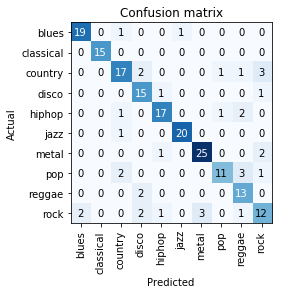

In [79]:
interpreter = ClassificationInterpretation.from_learner(learn)
interpreter.plot_confusion_matrix()

In [80]:
learn.save('resnet32-finetuned-18')

In [ ]:
learn.export('resnet32')